# Exploratory Analysis:

## Import libraries, load and convert data:

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numbers_parser import Document
import pandas as pd
import seaborn as sns

# Read `.numbers` file using `numbers_parser` library
doc = Document("../data/Expanded_Football_Talent_Data.numbers")
sheets = doc.sheets
tables = sheets[0].tables
data = tables[0].rows(values_only=True)
# Convert to pandas for easier manipulation, as it's only 500 rows
df = pd.DataFrame(data[1:], columns=data[0])

# Define conversion schema e.g. 
# Convert `object` to `StringDtype` for strings
# Convert float64 to less memory extensive types e.g. float32
# Both can be skipped since we're dealing with a small dataset and memory isn't an issue
# Some columns e.g. score related columns were initially loaded as `object` rather a numerical type
schema = {
    "player_id": "Int32",
    "age": "float32",
    "gender": "string",
    "country": "string",
    "height_cm": "float32",
    "in_app_ranking": "float32",
    "coach_feedback_score": "float32",
    "video_performance_score": "float32",
    "behavior_score": "float32",
    "position": "string",
    "currently_in_club": "uint8",
    "club_interest": "uint8",
}
# Apply type conversion
for col, dtype in schema.items():
    if col in df.columns:
        df[col] = df[col].astype(dtype)
# Preview
df.head()


/Users/abrougui/.pyenv/versions/3.11.10/envs/ai_footbal_env/lib/python3.11/site-packages/numbers_parser/containers.py:50: RuntimeWarning: unsupported version '10.2.3'
  self._iwork.open(filepath)


,player_id,age,gender,country,height_cm,video_performance_score,behavior_score,coach_feedback_score,currently_in_club,favorite_position,in_app_ranking,club_interest
0,1,15.0,Male,Brazil,156.0,61.180000,2.9,5.9,0,Defender,73.0,0
1,2,20.0,Male,Brazil,161.0,97.870003,4.2,1.9,1,Defender,23.0,1
2,3,15.0,Male,Egypt,179.0,78.650002,1.6,7.2,0,Defender,74.0,0
3,4,18.0,Male,Brazil,170.0,96.639999,7.9,3.2,1,Defender,83.0,0
4,5,15.0,Female,Brazil,180.0,78.760002,4.7,9.2,0,Defender,47.0,0


## Check for missing values and type validation:

In [106]:
# Missing values:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_summary)
# Ensure no missing values otherwise implement population (not the case for this dataset)
assert sum(missing_summary) == 0, "Some rows are missing values"

# Type validations:
# Numerical type columns assertions (Age, height, App ranking, etc.) are optional since 
# the columns were parsed successfully to float32
numerical_columns = df[df.select_dtypes(include=["float"]).columns].columns
    
# Ensure no nulls in id columns
assert df["player_id"].notnull().all(), "player_id should not contain nulls"

# Test scores range
assert df['video_performance_score'].between(0, 100).all(), "video_performance_score out of range"
assert df['coach_feedback_score'].between(0, 10).all(), "coach_feedback_score score out of range"
assert df['behavior_score'].between(0, 10).all(), "behavior_score score out of range"
# Ensure only 0 and 1 in binary columns
assert df['club_interest'].isin([0,1]).all(), "club_interest should be binary"
assert df['currently_in_club'].isin([0,1]).all(), "currently_in_club should be binary"

Missing values:
 player_id                  0
age                        0
gender                     0
country                    0
height_cm                  0
video_performance_score    0
behavior_score             0
coach_feedback_score       0
currently_in_club          0
favorite_position          0
in_app_ranking             0
club_interest              0
dtype: int64


## Numerical features distributions:

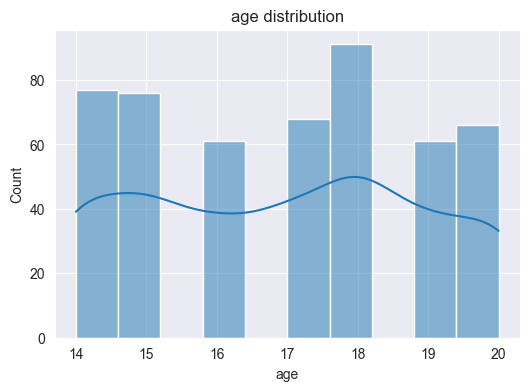

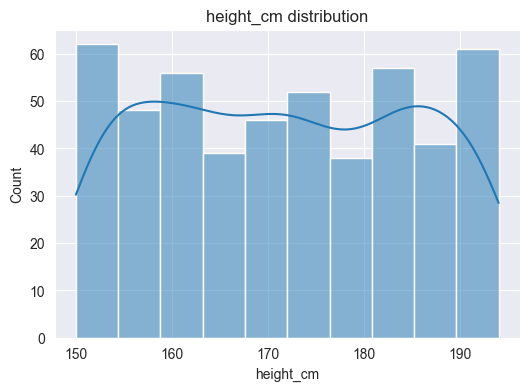

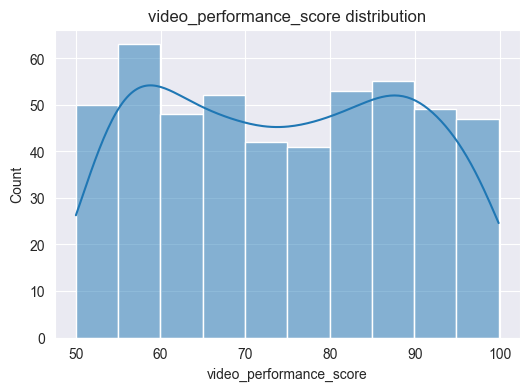

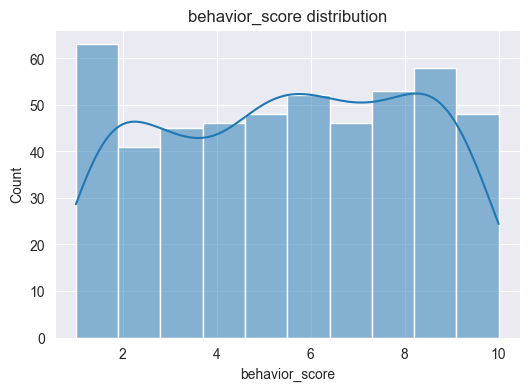

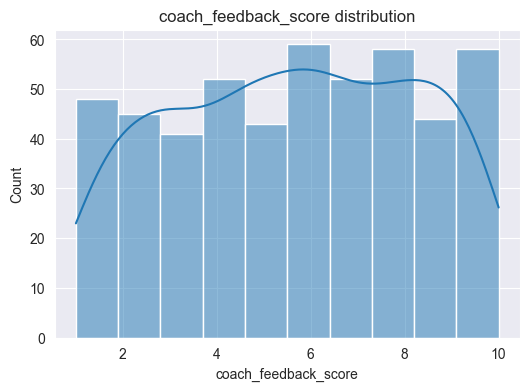

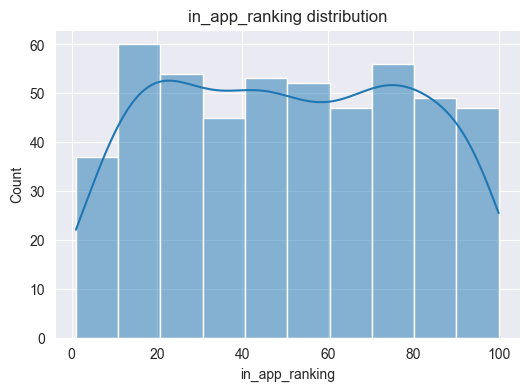

In [107]:
# Render dist plot for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()

## Categorical features distributions:

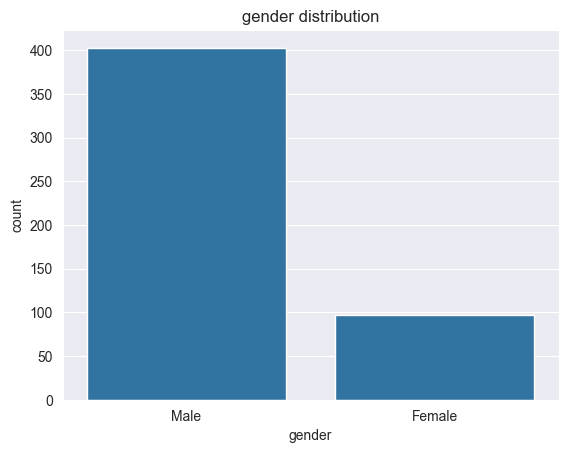

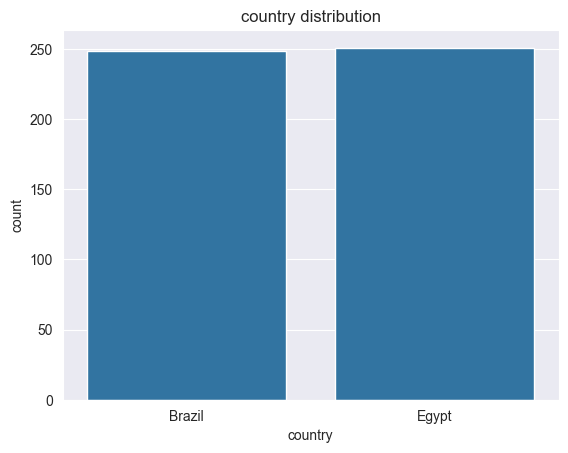

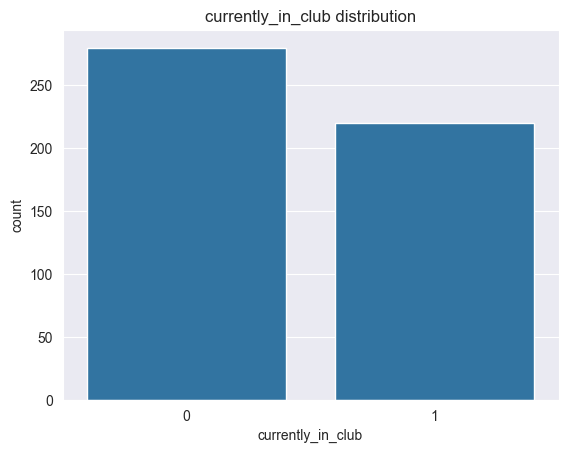

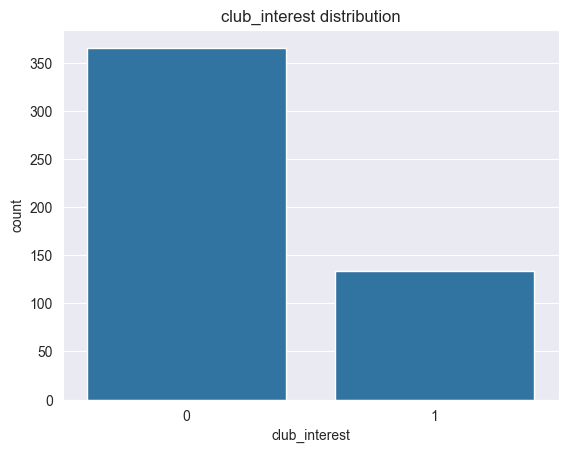

In [108]:
# Render dist plot for `gender`, `country` and `currently_in_club` 
# and also check the distribution of the label `club_interest`
for categorical_col in ["gender", "country", "currently_in_club", "club_interest"]:
    sns.countplot(x=categorical_col, data=df)
    plt.title(f"{categorical_col} distribution")
    plt.show()

## Club interest x Numerical features:

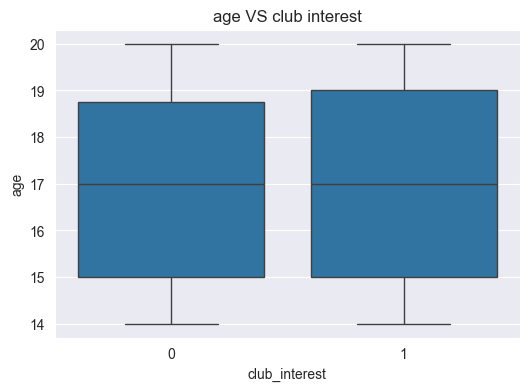

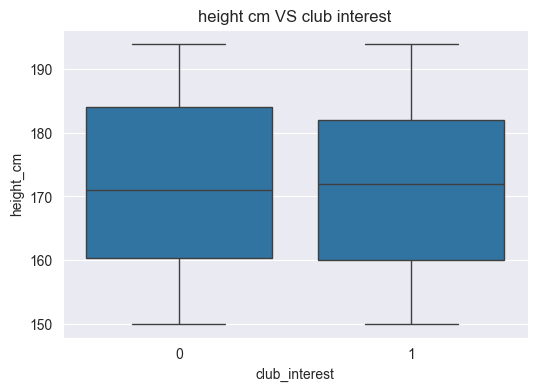

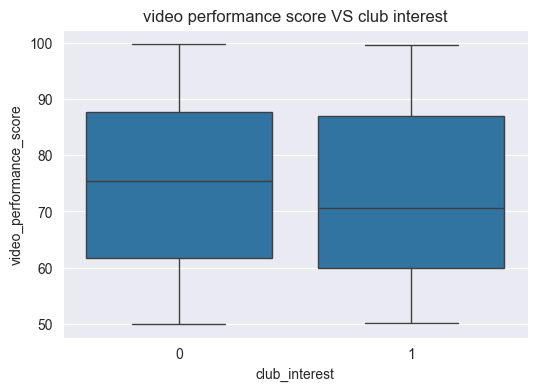

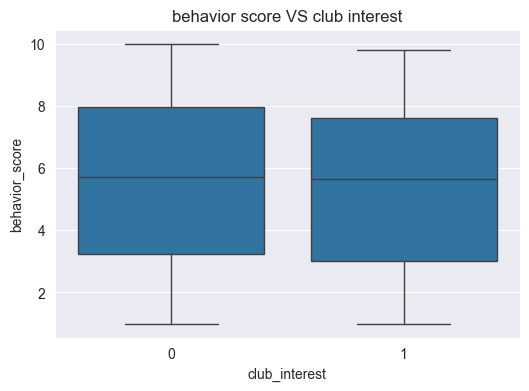

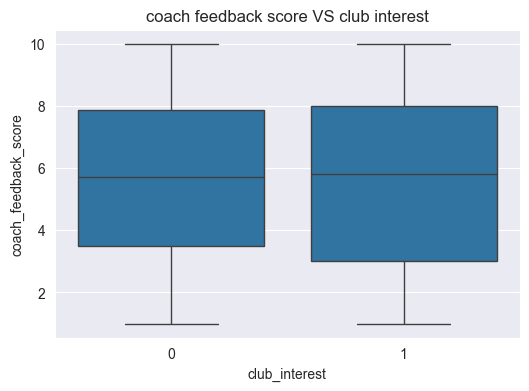

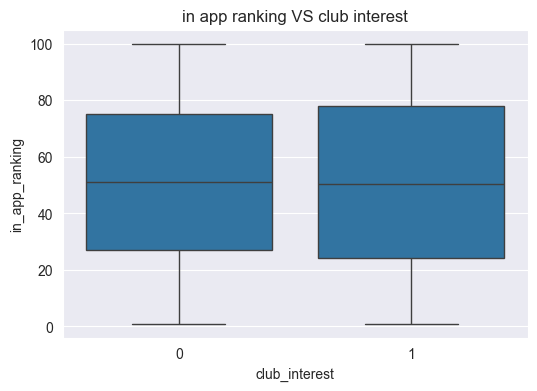

In [101]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='club_interest', y=col, data=df)
    plt.title(f'{col.replace("_", " ")} VS club interest')
    plt.show()

# Correlation matrix:

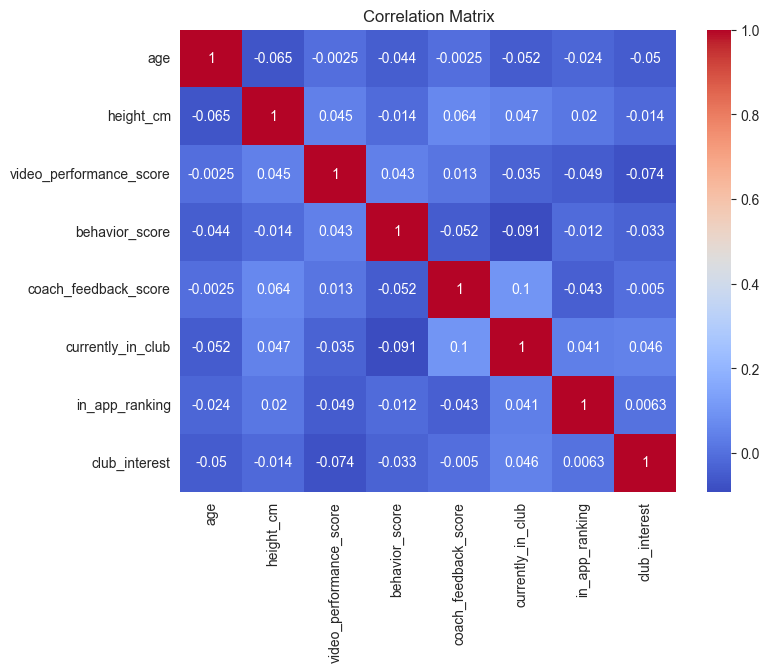

In [96]:
plt.figure(figsize=(8,6))
# Select all numerical columns except player_id
corr_matrix = df.select_dtypes(include=[np.number], exclude="int32").corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()